In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('D:/Tours.csv',parse_dates=True,index_col=['Years']) 

In [3]:
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,ToursNumbers
Years,,,,,,,,,,,,,,,,,,,,,
1995-01-01,619,0,9,304,0,"2,315,000","2,289,000",12,34,220,...,454,"1,351,000",44,68,0,61,"4,488,000",163,"1,416,000",478515913
1996-01-01,641,0,21,287,0,"2,572,000","2,614,000",13,35,228,...,373,"1,607,000",46,73,0,74,"4,915,000",264,"1,597,000",503394620
1997-01-01,650,0,45,119,0,"2,476,000","2,764,000",23,26,240,...,393,"1,716,000",50,68,0,80,"4,976,000",341,"1,336,000",530771308
1998-01-01,647,0,52,184,0,"2,991,000","3,012,000",32,36,234,...,422,"1,520,000",52,78,0,88,"5,732,000",362,"2,090,000",550675179
1999-01-01,683,0,45,371,"2,347,000","3,393,000","2,898,000",41,41,232,...,484,"1,782,000",51,85,0,58,"5,890,000",404,"2,250,000",576771177
2000-01-01,721,0,51,317,"2,949,000","3,907,000","2,909,000",45,44,207,...,546,"2,140,000",58,88,0,73,"5,872,000",457,"1,967,000",634510199
2001-01-01,691,0,67,354,"3,516,000","4,134,000","2,620,000",123,36,215,...,527,"2,330,000",53,88,0,76,"5,787,000",492,"2,217,000",634359181
2002-01-01,643,0,91,470,"3,387,000","5,445,000","2,820,000",162,0,218,...,520,"2,628,000",49,89,0,98,"6,430,000",565,"2,041,000",650504998
2003-01-01,642,0,107,557,"3,138,000","5,871,000","2,995,000",206,0,239,...,538,"2,429,000",50,92,0,155,"6,505,000",413,"2,256,000",644515819


In [4]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       ...
       'Unnamed: 210', 'Unnamed: 211', 'Unnamed: 212', 'Unnamed: 213',
       'Unnamed: 214', 'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217',
       'Unnamed: 218', 'ToursNumbers'],
      dtype='object', length=219)

In [5]:
df.drop(columns={'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
                'Unnamed: 210', 'Unnamed: 211', 'Unnamed: 212', 'Unnamed: 213',
       'Unnamed: 214', 'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217',
       'Unnamed: 218'},inplace=True)

In [6]:
df.columns.to_list()

['Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 'Unnamed: 63',
 'Unnamed: 64',
 'Unnamed: 65',
 'Unnamed: 66',
 'Unnamed: 67',
 'Unnamed: 68',
 'Unnamed: 69',
 'Unnamed: 70',
 'Unnamed: 71',
 'Unnamed: 72',
 'Unname

In [7]:
df.drop(columns={'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 'Unnamed: 63',
 'Unnamed: 64',
 'Unnamed: 65',
 'Unnamed: 66',
 'Unnamed: 67',
 'Unnamed: 68',
 'Unnamed: 69',
 'Unnamed: 70',
 'Unnamed: 71',
 'Unnamed: 72',
 'Unnamed: 73',
 'Unnamed: 74',
 'Unnamed: 75',
 'Unnamed: 76',
 'Unnamed: 77',
 'Unnamed: 78',
 'Unnamed: 79',
 'Unnamed: 80',
 'Unnamed: 81',
 'Unnamed: 82',
 'Unnamed: 83',
 'Unnamed: 84',
 'Unnamed: 85',
 'Unnamed: 86',
 'Unnamed: 87',
 'Unnamed: 88',
 'Unnamed: 89',
 'Unnamed: 90',
 'Unnamed: 91',
 'Unnamed: 92',
 'Unnamed: 93',
 'Unnamed: 94',
 'Unnamed: 95',
 'Unnamed: 96',
 'Unnamed: 97',
 'Unnamed: 98',
 'Unnamed: 99',
 'Unnamed: 100',
 'Unnamed: 101',
 'Unnamed: 102',
 'Unnamed: 103',
 'Unnamed: 104',
 'Unnamed: 105',
 'Unnamed: 106',
 'Unnamed: 107',
 'Unnamed: 108',
 'Unnamed: 109',
 'Unnamed: 110',
 'Unnamed: 111',
 'Unnamed: 112',
 'Unnamed: 113',
 'Unnamed: 114',
 'Unnamed: 115',
 'Unnamed: 116',
 'Unnamed: 117',
 'Unnamed: 118',
 'Unnamed: 119',
 'Unnamed: 120',
 'Unnamed: 121',
 'Unnamed: 122',
 'Unnamed: 123',
 'Unnamed: 124',
 'Unnamed: 125',
 'Unnamed: 126',
 'Unnamed: 127',
 'Unnamed: 128',
 'Unnamed: 129',
 'Unnamed: 130',
 'Unnamed: 131',
 'Unnamed: 132',
 'Unnamed: 133',
 'Unnamed: 134',
 'Unnamed: 135',
 'Unnamed: 136',
 'Unnamed: 137',
 'Unnamed: 138',
 'Unnamed: 139',
 'Unnamed: 140',
 'Unnamed: 141',
 'Unnamed: 142',
 'Unnamed: 143',
 'Unnamed: 144',
 'Unnamed: 145',
 'Unnamed: 146',
 'Unnamed: 147',
 'Unnamed: 148',
 'Unnamed: 149',
 'Unnamed: 150',
 'Unnamed: 151',
 'Unnamed: 152',
 'Unnamed: 153',
 'Unnamed: 154',
 'Unnamed: 155',
 'Unnamed: 156',
 'Unnamed: 157',
 'Unnamed: 158',
 'Unnamed: 159',
 'Unnamed: 160',
 'Unnamed: 161',
 'Unnamed: 162',
 'Unnamed: 163',
 'Unnamed: 164',
 'Unnamed: 165',
 'Unnamed: 166',
 'Unnamed: 167',
 'Unnamed: 168',
 'Unnamed: 169',
 'Unnamed: 170',
 'Unnamed: 171',
 'Unnamed: 172',
 'Unnamed: 173',
 'Unnamed: 174',
 'Unnamed: 175',
 'Unnamed: 176',
 'Unnamed: 177',
 'Unnamed: 178',
 'Unnamed: 179',
 'Unnamed: 180',
 'Unnamed: 181',
 'Unnamed: 182',
 'Unnamed: 183',
 'Unnamed: 184',
 'Unnamed: 185',
 'Unnamed: 186',
 'Unnamed: 187',
 'Unnamed: 188',
 'Unnamed: 189',
 'Unnamed: 190',
 'Unnamed: 191',
 'Unnamed: 192',
 'Unnamed: 193',
 'Unnamed: 194',
 'Unnamed: 195',
 'Unnamed: 196',
 'Unnamed: 197',
 'Unnamed: 198',
 'Unnamed: 199',
 'Unnamed: 200',
 'Unnamed: 201',
 'Unnamed: 202',
 'Unnamed: 203',
 'Unnamed: 204',
 'Unnamed: 205',
 'Unnamed: 206',
 'Unnamed: 207',
 'Unnamed: 208',
 'Unnamed: 209'},inplace=True)

In [8]:
df.head()

,ToursNumbers
Years,
1995-01-01,478515913
1996-01-01,503394620
1997-01-01,530771308
1998-01-01,550675179
1999-01-01,576771177


In [9]:
ts = df.ToursNumbers.resample('A').sum()

In [10]:
ts

Years
1995-12-31     478515913
1996-12-31     503394620
1997-12-31     530771308
1998-12-31     550675179
1999-12-31     576771177
2000-12-31     634510199
2001-12-31     634359181
2002-12-31     650504998
2003-12-31     644515819
2004-12-31     706034831
2005-12-31     756633327
2006-12-31     794631272
2007-12-31     855268375
2008-12-31     876613733
2009-12-31     838515401
2010-12-31     892358155
2011-12-31     927892045
2012-12-31     977433485
2013-12-31    1028967801
2014-12-31    1087226013
2015-12-31    1137148259
2016-12-31    1181602249
2017-12-31    1264568717
Freq: A-DEC, Name: ToursNumbers, dtype: int64

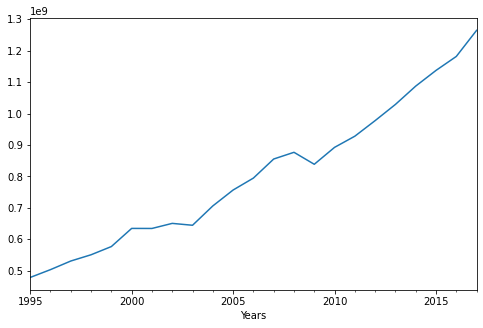

In [11]:
plt.figure(figsize=(8,5))
ts.plot()
plt.show()

In [12]:
#Checking for stationarity
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(ts)
print("The test is : " , adftest[0])
print('p-value: %f' % adftest[1])

The test is :  6.413957213572429
p-value: 1.000000


In [13]:
ts_diff = ts.diff(periods=1).dropna()

In [14]:
ts_diff

Years
1996-12-31    24878707.0
1997-12-31    27376688.0
1998-12-31    19903871.0
1999-12-31    26095998.0
2000-12-31    57739022.0
2001-12-31     -151018.0
2002-12-31    16145817.0
2003-12-31    -5989179.0
2004-12-31    61519012.0
2005-12-31    50598496.0
2006-12-31    37997945.0
2007-12-31    60637103.0
2008-12-31    21345358.0
2009-12-31   -38098332.0
2010-12-31    53842754.0
2011-12-31    35533890.0
2012-12-31    49541440.0
2013-12-31    51534316.0
2014-12-31    58258212.0
2015-12-31    49922246.0
2016-12-31    44453990.0
2017-12-31    82966468.0
Freq: A-DEC, Name: ToursNumbers, dtype: float64

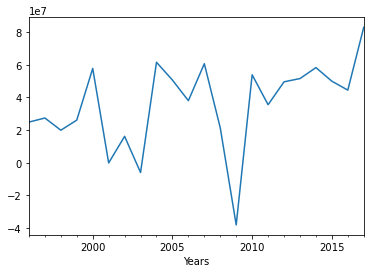

In [15]:
ts_diff.plot()
plt.show()

In [16]:
ts_diff_2 = ts_diff.diff(periods=1).dropna()

In [17]:
ts_diff_2

Years
1997-12-31     2497981.0
1998-12-31    -7472817.0
1999-12-31     6192127.0
2000-12-31    31643024.0
2001-12-31   -57890040.0
2002-12-31    16296835.0
2003-12-31   -22134996.0
2004-12-31    67508191.0
2005-12-31   -10920516.0
2006-12-31   -12600551.0
2007-12-31    22639158.0
2008-12-31   -39291745.0
2009-12-31   -59443690.0
2010-12-31    91941086.0
2011-12-31   -18308864.0
2012-12-31    14007550.0
2013-12-31     1992876.0
2014-12-31     6723896.0
2015-12-31    -8335966.0
2016-12-31    -5468256.0
2017-12-31    38512478.0
Freq: A-DEC, Name: ToursNumbers, dtype: float64

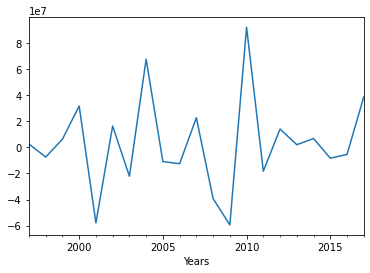

In [18]:
ts_diff_2.plot()
plt.show()

<Figure size 1440x288 with 0 Axes>

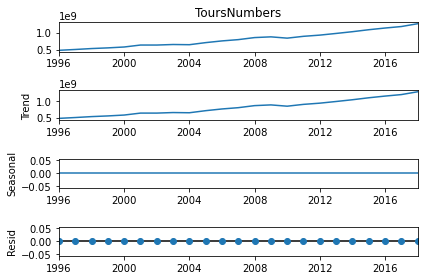

In [19]:
import statsmodels.api as sm
plt.figure(figsize=(20,4))
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
decomposition.plot()
plt.show()

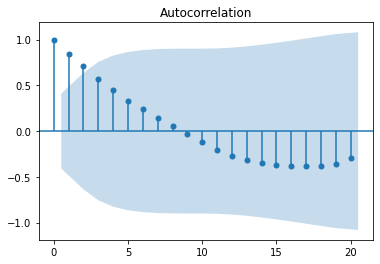

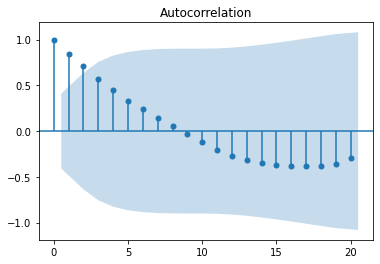

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(ts,lags=20)

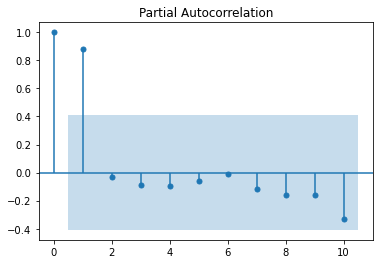

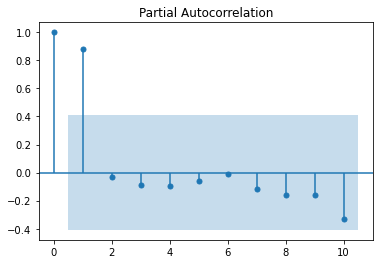

In [21]:
plot_pacf(ts,lags=10)

In [22]:
len(ts)

23

In [23]:
train= ts[:19]
test = ts[19:]

In [24]:
#Getting the pdq values
orders1 = []
rmse = []
p=range(0,8)
q=range(0,8)
d=range(0,2)

import itertools
pdq_com= list(itertools.product(p,d,q))
len(pdq_com)


128

In [25]:
#Getting the erors of the combination orders
for pdq in pdq_com:
    try:
        model = ARIMA(train,order=(pdq)).fit()
        pred = model.predict(start=len(train), end=(len(ts)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        orders1.append(pdq)
        rmse.append(error)
    except:
        continue
        

In [26]:
results = pd.DataFrame(index=orders1,data=rmse,columns=['RMSE'])

In [28]:
results.to_csv('D:/ARIMA301.csv')

In [29]:
#Fitting the model
model_2 = ARIMA(train,order=(5,0,0)).fit()

In [30]:
print(model_2.summary())

                              ARMA Model Results                              
Dep. Variable:           ToursNumbers   No. Observations:                   19
Model:                     ARMA(5, 0)   Log Likelihood                -357.286
Method:                       css-mle   S.D. of innovations       31063993.008
Date:                Mon, 09 Jan 2023   AIC                            728.572
Time:                        19:31:44   BIC                            735.183
Sample:                    12-31-1995   HQIC                           729.691
                         - 12-31-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.294e+08   2.27e+08      3.216      0.001    2.85e+08    1.17e+09
ar.L1.ToursNumbers     1.3160      0.227      5.799      0.000       0.871       1.761
ar.L2.ToursNumbers  

In [52]:
pred = model.predict(start=len(train), end=(len(ts)+20))
pred

2014-12-31    2.414239e+07
2015-12-31    3.885872e+06
2016-12-31    3.052759e+07
2017-12-31    2.847664e+07
2018-12-31    3.970795e+07
2019-12-31    4.362957e+07
2020-12-31    2.977097e+07
2021-12-31    2.116054e+07
2022-12-31    2.699293e+07
2023-12-31    2.705908e+07
2024-12-31    3.412086e+07
2025-12-31    3.741131e+07
2026-12-31    3.189930e+07
2027-12-31    2.793599e+07
2028-12-31    2.796286e+07
2029-12-31    2.772926e+07
2030-12-31    3.143024e+07
2031-12-31    3.367210e+07
2032-12-31    3.202654e+07
2033-12-31    3.031021e+07
2034-12-31    2.929278e+07
2035-12-31    2.879475e+07
2036-12-31    3.043558e+07
2037-12-31    3.175744e+07
2038-12-31    3.155519e+07
Freq: A-DEC, dtype: float64

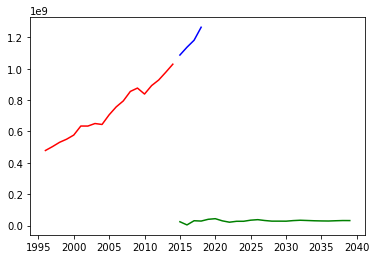

In [53]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(pred, color='green')
plt.show()

In [34]:
models = ARIMA(train,order=(6,0,0)).fit()

In [35]:
print(models.summary())

                              ARMA Model Results                              
Dep. Variable:           ToursNumbers   No. Observations:                   19
Model:                     ARMA(6, 0)   Log Likelihood                -362.378
Method:                       css-mle   S.D. of innovations       28753928.409
Date:                Mon, 09 Jan 2023   AIC                            740.756
Time:                        19:33:43   BIC                            748.311
Sample:                    12-31-1995   HQIC                           742.034
                         - 12-31-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.294e+08        nan        nan        nan         nan         nan
ar.L1.ToursNumbers     1.2136   8.57e-06   1.42e+05      0.000       1.214       1.214
ar.L2.ToursNumbers  

In [48]:
preds= models.predict(start=len(train), end=(len(ts)+20))
preds

2014-12-31    1.031763e+09
2015-12-31    1.064826e+09
2016-12-31    1.091486e+09
2017-12-31    1.120045e+09
2018-12-31    1.154133e+09
2019-12-31    1.167650e+09
2020-12-31    1.190369e+09
2021-12-31    1.210834e+09
2022-12-31    1.230017e+09
2023-12-31    1.252672e+09
2024-12-31    1.266831e+09
2025-12-31    1.283287e+09
2026-12-31    1.298855e+09
2027-12-31    1.312848e+09
2028-12-31    1.328378e+09
2029-12-31    1.340362e+09
2030-12-31    1.352549e+09
2031-12-31    1.364267e+09
2032-12-31    1.374792e+09
2033-12-31    1.385783e+09
2034-12-31    1.395212e+09
2035-12-31    1.404317e+09
2036-12-31    1.413083e+09
2037-12-31    1.421052e+09
2038-12-31    1.429018e+09
Freq: A-DEC, dtype: float64

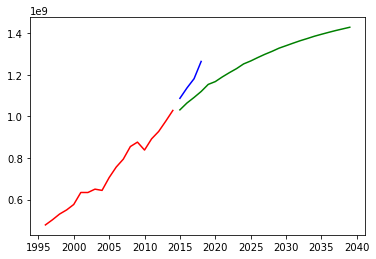

In [49]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(preds, color='green')
plt.show()

In [38]:
modelss = ARIMA(train,order=(4,0,0)).fit()

In [39]:
print(modelss.summary())

                              ARMA Model Results                              
Dep. Variable:           ToursNumbers   No. Observations:                   19
Model:                     ARMA(4, 0)   Log Likelihood                -357.321
Method:                       css-mle   S.D. of innovations       31168572.121
Date:                Mon, 09 Jan 2023   AIC                            726.642
Time:                        19:36:51   BIC                            732.308
Sample:                    12-31-1995   HQIC                           727.601
                         - 12-31-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.294e+08   2.24e+08      3.261      0.001    2.91e+08    1.17e+09
ar.L1.ToursNumbers     1.3293      0.221      6.010      0.000       0.896       1.763
ar.L2.ToursNumbers  

In [50]:
preds_1= modelss.predict(start=len(train), end=(len(ts)+20))
preds_1

2014-12-31    1.057067e+09
2015-12-31    1.079307e+09
2016-12-31    1.094513e+09
2017-12-31    1.101240e+09
2018-12-31    1.102262e+09
2019-12-31    1.098171e+09
2020-12-31    1.089593e+09
2021-12-31    1.077499e+09
2022-12-31    1.062557e+09
2023-12-31    1.045386e+09
2024-12-31    1.026579e+09
2025-12-31    1.006635e+09
2026-12-31    9.859989e+08
2027-12-31    9.650566e+08
2028-12-31    9.441382e+08
2029-12-31    9.235229e+08
2030-12-31    9.034434e+08
2031-12-31    8.840891e+08
2032-12-31    8.656106e+08
2033-12-31    8.481237e+08
2034-12-31    8.317128e+08
2035-12-31    8.164349e+08
2036-12-31    8.023229e+08
2037-12-31    7.893890e+08
2038-12-31    7.776273e+08
Freq: A-DEC, dtype: float64

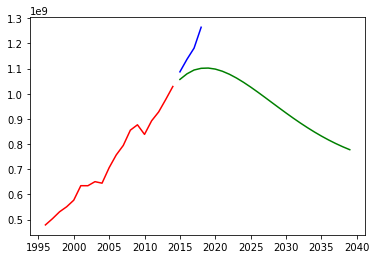

In [51]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(preds_1, color='green')
plt.show()

In [42]:
model_x = ARIMA(train,order=(3,0,0)).fit()

In [43]:
print(model_x.summary())

                              ARMA Model Results                              
Dep. Variable:           ToursNumbers   No. Observations:                   19
Model:                     ARMA(3, 0)   Log Likelihood                -357.664
Method:                       css-mle   S.D. of innovations       31921215.071
Date:                Mon, 09 Jan 2023   AIC                            725.328
Time:                        19:39:15   BIC                            730.050
Sample:                    12-31-1995   HQIC                           726.127
                         - 12-31-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.294e+08   2.25e+08      3.239      0.001    2.88e+08    1.17e+09
ar.L1.ToursNumbers     1.3884      0.214      6.501      0.000       0.970       1.807
ar.L2.ToursNumbers  

In [46]:
preds_2= model_x.predict(start=len(train), end=(len(ts)+20))
preds_2

2014-12-31    1.057139e+09
2015-12-31    1.075687e+09
2016-12-31    1.083579e+09
2017-12-31    1.084336e+09
2018-12-31    1.079273e+09
2019-12-31    1.070002e+09
2020-12-31    1.057630e+09
2021-12-31    1.043111e+09
2022-12-31    1.027180e+09
2023-12-31    1.010427e+09
2024-12-31    9.933108e+08
2025-12-31    9.761849e+08
2026-12-31    9.593190e+08
2027-12-31    9.429139e+08
2028-12-31    9.271148e+08
2029-12-31    9.120228e+08
2030-12-31    8.977037e+08
2031-12-31    8.841953e+08
2032-12-31    8.715139e+08
2033-12-31    8.596587e+08
2034-12-31    8.486165e+08
2035-12-31    8.383644e+08
2036-12-31    8.288726e+08
2037-12-31    8.201069e+08
2038-12-31    8.120297e+08
Freq: A-DEC, dtype: float64

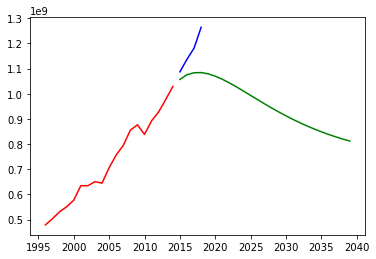

In [47]:
plt.plot(train,color='red')
plt.plot(test,color='blue')
plt.plot(preds_2, color='green')
plt.show()

-THE END 